In [1]:
using CHull2D
using FixedSizeArrays
using PyPlot

INFO: Recompiling stale cache file /home/chase/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/chase/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/chase/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.


# Graham Scan Algorithm

This notebook is a piece of a sequence of notebooks that discuss numerical convex hull algorithms. The goal of these algorithms is to take a set of points $P$ and output a set of extreme points $EP$ such that every point in $P$ is contained in $\text{co}(EP)$.

In this notebook we present the Graham Scan algorithm.

## Introduction

This algorithm was initially introduced by Ronald Graham in 1972 in "An Efficient Algorithm for Determining the Convex Hull of a Finite Planar Set." The algorithm will have $O(n \log(n))$ complexity mostly due to the required sorting done within the algorithm. As you will observe, the way in which the algorithm traverses the points will lead for it to be a better fit for sets of points which have many extreme points.


## The Algorithm

The algorithm has two main parts:

* First, all points must be sorted relative to some initial point which is known to be an extreme point.
* Second, move along the points and make sure that the "turns" between points are all the same direction.

### Part 1: The Sort

In our implementation, we will use the point with the minimum $y$ value as the initial point. Additionally, our rotation direction will be counter-clockwise.

Call our initial point $a$. What we really need to know is whether for any two points $b, c \in P$ whether the angle formed by $\vec{ab}$ and $\vec{bc}$ is greater than or less than 180 degrees. This can be determined by using the cross-product. If the cross-product is negative then we have moved clockwise; if the cross-product is positive then we have moved counter-clockwise (as desired). This leaves us to simply sort by comparing the appropriate cross-product between vectors -- It turns out we can directly write this as:

$$\vec{ab} \times \vec{bc} = (b_1 - a_1) (c_2 - a_2) - (b_2 - a_2) (c_1 - a_1)$$

We wrote a function to do this in the [ConvexHulls notebook](ConvexHulls.ipynb).

### Part 2: Finding Points

As previously mentioned, we will begin with the point which has the smallest $y$ value. We will then work through our ordered points three at a time.

Imagine we have three points $p_{i-1}, p_{i}, p_{i+1}$.

* If these points constitute a counter-clockwise turn as desired then we proceed to compare points $p_{i}, p_{i+1}, p_{i+2}$.
* If these points constitute a clockwise turn then we know that $p_{i}$ is not an element of the extreme points and can discard it. We would then "take a step backwards" and compare $p_{i-2}, p_{i-1}, p_{i+1}$

We follow until we reach the final point (which is also our starting point).

This is the `wrappoints` function from the [ConvexHulls notebook](ConvexHulls.ipynb).

### Summary of Algorithm

To summarize the algorithm we could write:

1. Begin with a point that we know is a member of the extreme points -- for example, the point with the minimum y value. Call this point $p_0$.
2. Sort all points by their polar angle with respect to $p_0$
3. Given $p_{i-1}, p_{i}, p_{i+1}$:
    * If points move clockwise, then $p_{i}$ is not an element of the extreme points and we remove it from the set of points. We then consider $p_{i-1}, p_{i+1}, p_{i+2}$.
    * If points move counter-clockwise, then move forward to next step by consider $p_{i}, p_{i+1}, p_{i+2}$.
4. Continue until reach the point $p_0$ again.

## Implementation

Below we implement the algorithm.

In [2]:
function _grahamscan{T<:Real}(p::Vector{Point{2, T}})

    # Get yminind
    xminind = indmin(p)
    xmin = p[xminind]

    # Create function to sort by angles
    lt(a, b) = xmin == a ? true : xmin == b ? false : ccw(xmin, a, b)
    psort = sort!(p, lt=lt)

    # Add the starting point at end so we go full circle
    push!(psort, xmin)

    # Call function that works around points
    ep = wrappoints(psort)

    return ep[1:end-1]
end


_grahamscan (generic function with 1 method)

## Example Use

We can now use the Graham scan algorithm to get the Convex Hull and plot it.

In [3]:
srand(1112016)
p = [Point(randn(), randn()) for i=1:250]
ep = _grahamscan(p)

# Add the first point to end to make plot pretty
push!(ep, ep[1]);

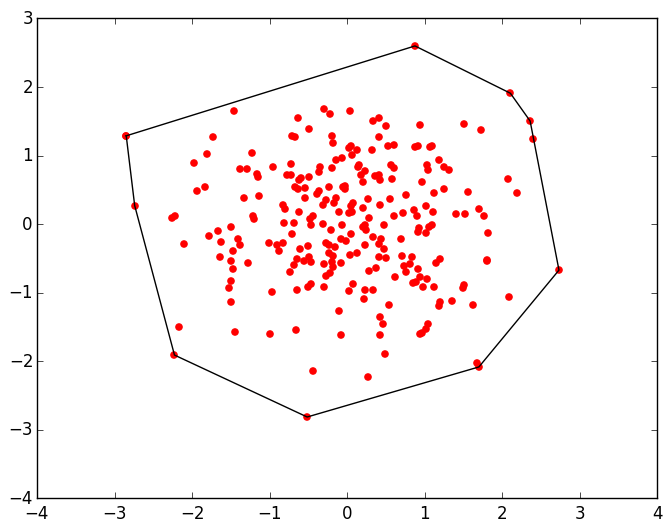

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f55a1af3e10>

In [7]:
fig, ax = subplots()

ax[:scatter]([el[1] for el in p], [el[2] for el in p], color="r")
ax[:plot]([el[1] for el in ep], [el[2] for el in ep], color="k")

## References

### Academic Papers

* Graham, R.L. (1972). An Efficient Algorithm for Determining the Convex Hull of a Finite Planar Set. Information Processing Letters 1, 132-133
* Williams, J. W. J. (1964), "Algorithm 232 - Heapsort", Communications of the ACM 7 (6): 347–348

### Useful Wikipedia Pages

* https://en.wikipedia.org/wiki/Graham_scan
* https://en.wikipedia.org/wiki/Heapsort
* https://en.wikipedia.org/wiki/Cross_product